In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)
import os
from openpyxl import Workbook
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglv1 import BGLog, get_embedding_layer
from oclog.openset.boundary_loss import euclidean_metric, BoundaryLoss
from oclog.openset.pretrainingV1 import LogLineEncoder, LogSeqEncoder, LogClassifier
# from oclog.openset.openset import OpenSet
from oclog.openset.opensetv11_debug import OpenSet
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE
tf.random.set_seed(1234)
np.random.seed(1234) 

In [2]:
# oset = OpenSet()
# train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
#                                                            load_from_pkl=True, ablation=1500,
#                                                            debug=True,
#                                                           designated_ukc_cls=5)
# res = oset.train(train_data=train_data, val_data=val_data,
#                  test_data=test_data, bglog=bglog, 
#                  manual_color_map=True, centroid_black=True,                               
#                  tsne_n_iter=2000, tsne_perplexity=8,
#                  embedding_size=12, oc_lr=2.5, pt_epochs=1, oc_epochs=3,)

In [3]:
# oset = OpenSet()
# train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
#                                                            load_from_pkl=True, ablation=1500,
#                                                            debug=True,
#                                                           designated_ukc_cls=5)
# res = oset.train(train_data=train_data, val_data=val_data,
#                  test_data=test_data, bglog=bglog, 
#                  manual_color_map=True, centroid_black=True,                               
#                  tsne_n_iter=2000, tsne_perplexity=8,
#                  embedding_size=12, oc_lr=2.5, pt_epochs=2, oc_epochs=2,)

In [4]:
# tbatch = next(iter(test_data))

In [5]:
# print('actual:', np.argmax(tbatch[1].numpy(), axis=1))
# print('predic:', np.argmax(oset.ptmodel.predict(tbatch[0]), axis=1))

In [6]:
##### previous norebook location Notebook location:
# http://localhost:8888/lab/tree/MyDev/OCLog/oclog/openset/notebooks/notebook_mixlog/UNOC.ipynb


In [7]:
# test_batch = next(iter(test_data))
# seq_batch, label_batch = test_batch
# print('prediction:  ', oset.ptmodel.predict(seq_batch).argmax(axis=-1))
# print('actual label:', tf.math.argmax(label_batch, axis=1).numpy())
# t_preds, t_label = [], []
# for batch in test_data:
#     logseq_batch, label_batch = batch
#     t_preds.append(oset.ptmodel.predict(seq_batch).argmax(axis=-1))
#     t_label.append(tf.math.argmax(label_batch, axis=1).numpy())
# fpreds = list(np.array(t_preds).reshape(576))
# flabels = list(np.array(t_label).reshape(576))
# cm = confusion_matrix(fpreds, flabels)
# cls_report = m.classification_report(fpreds, flabels)
# print('confusion matrix:\n',cm)
# print('classification report:\n', cls_report)

In [8]:
# oset.evaluate(test_data, ptmodel_eval=True)  ## this did not work

ablation set to : 1500
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 1200, val_0:, 150, test_0:, 150, train_1:, 1200, val_1:, 150, test_1:, 150, train_2:, 1200, val_2:, 150, test_2:, 150, 902 data in class 3 not enough to split into train:1200 and validation:150, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
628 data in class 4 not enough to split into train:1200 and validation:150, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
class 5 is added as ukc
ukc_5:, 150
75 data in class 6 not enough to split into train:1200 and validation:150, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
train: 0    1200
1    1200
2    1200
Name: label, dtype: int64
val: 0    150
1    150
2    150
Name: label, dtype: int64
test: 0    150
1    150
2    1

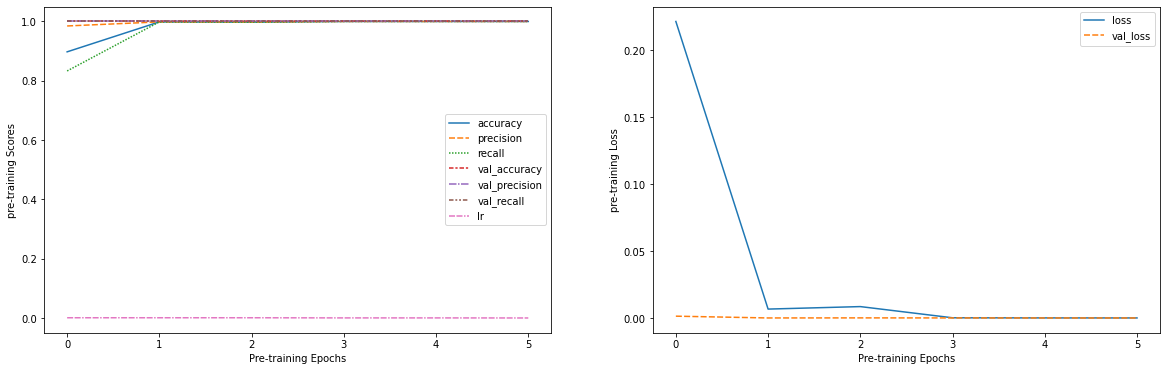

run_id:  2022-05-28_17_55_12.610291_38c32387de8111ec8594ac8247733f47
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


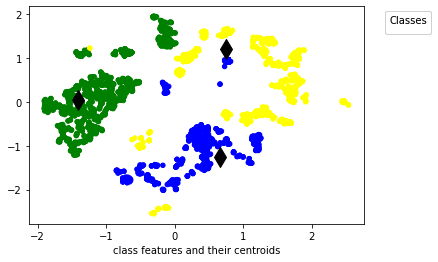

run_id:  2022-05-28_17_55_31.966443_444ca735de8111ecb136ac8247733f47


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.49it/s]


epoch: 1/10, train_loss: 7.273138523101807, F1_train: 0.42267318209994065 F1_val: 0.3761091393078971


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.49it/s]


epoch: 2/10, train_loss: 7.279648303985596, F1_train: 0.4846134103123803 F1_val: 0.40651732249786143


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.53it/s]


epoch: 3/10, train_loss: 7.268989562988281, F1_train: 0.5244621498219525 F1_val: 0.42039995822890563


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.53it/s]


epoch: 4/10, train_loss: 7.256278991699219, F1_train: 0.5464607812066343 F1_val: 0.4369703389830509


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.45it/s]


epoch: 5/10, train_loss: 7.285012245178223, F1_train: 0.5581582637899959 F1_val: 0.43473819612590797


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.52it/s]


epoch: 6/10, train_loss: 7.277941703796387, F1_train: 0.6539882874300168 F1_val: 0.6534598214285714


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.51it/s]


epoch: 7/10, train_loss: 7.275320529937744, F1_train: 0.6570923425044312 F1_val: 0.6534598214285714


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.52it/s]


epoch: 8/10, train_loss: 7.278454303741455, F1_train: 0.6587394109511477 F1_val: 0.653455919080919


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.54it/s]


epoch: 9/10, train_loss: 7.280642032623291, F1_train: 0.660508171147004 F1_val: 0.6512198189134809


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.52it/s]


epoch: 10/10, train_loss: 7.271785259246826, F1_train: 0.663077238971659 F1_val: 0.6546633897461424


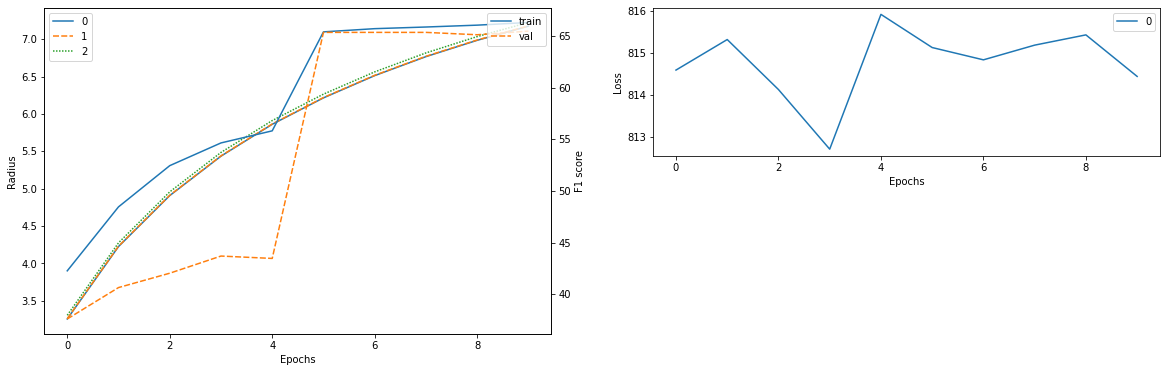

classification report for training:
[[1195    0    0    1]
 [   0   16    0 1176]
 [   0    0 1107   89]
 [   0    0    0    0]]
64.68
f1_weighted: 0.6631853338185244, f1_macro: 0.4968566464612233, f1_micro: 0.6467633928571429, f_measure: {'Known': 66.2476, 'Open': 0, 'F1-score': 49.6857}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1196
           1       1.00      0.01      0.03      1192
           2       1.00      0.93      0.96      1196
           5       0.00      0.00      0.00         0

    accuracy                           0.65      3584
   macro avg       0.75      0.48      0.50      3584
weighted avg       1.00      0.65      0.66      3584

classification report for test data:
[[142   0   0   0]
 [  0   0   0 147]
 [  0   0 111  33]
 [  1   0   0 142]]
68.58
f1_weighted: 0.6149376643696527, f1_macro: 0.619458037884084, f1_micro: 0.6857638888888888, f_measure: {'Known': 62.236, 'Open': 61.0753, 'F1-score': 61.94

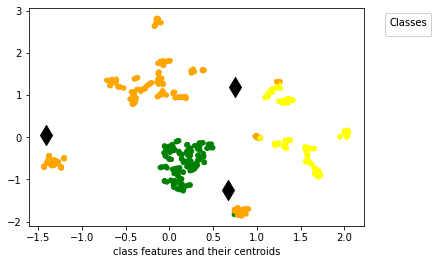

after plot ....total_label: 576, total_preds: 576
INFO:tensorflow:Assets written to: ram://ef9fa1d3-feff-48e1-8c62-c6b78d261c2b/assets


In [9]:
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=1500,
                                                           debug=True,
                                                          designated_ukc_cls=5)
res = oset.train(train_data=train_data, val_data=val_data,
                 test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=True,                               
                 tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=12, oc_lr=2.5, pt_epochs=6, oc_epochs=10,)

In [10]:
print(f'total_label: {len(oset.total_labels)}, total_preds: {len(oset.total_preds)}')

total_label: 576, total_preds: 576


## 1.5K with predicted label

the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


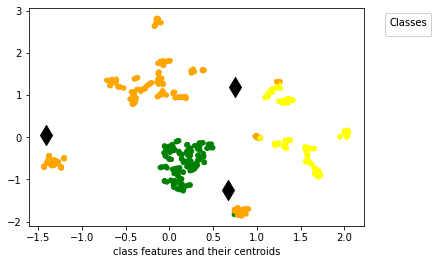

In [11]:
oset.plot_centroids(use_labels=oset.total_preds, manual_color_map=True, centroid_black=True,                               
                 tsne_n_iter=2000, tsne_perplexity=8,)

## 1.5K with actual label

the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


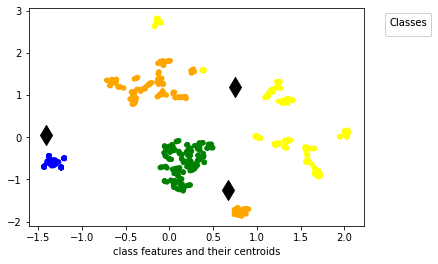

In [12]:
oset.plot_centroids(use_labels=oset.total_labels, manual_color_map=True, centroid_black=True,                               
                 tsne_n_iter=2000, tsne_perplexity=8,)

ablation set to : 5000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 4000, val_0:, 500, test_0:, 500, train_1:, 4000, val_1:, 500, test_1:, 500, 4049 data in class 2 not enough to split into train:4000 and validation:500, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
902 data in class 3 not enough to split into train:4000 and validation:500, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
628 data in class 4 not enough to split into train:4000 and validation:500, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
class 5 is added as ukc
ukc_5:, 165
75 data in class 6 not enough to split into train:4000 and validation:500, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
train: 0    4000
1    4000
Name: 

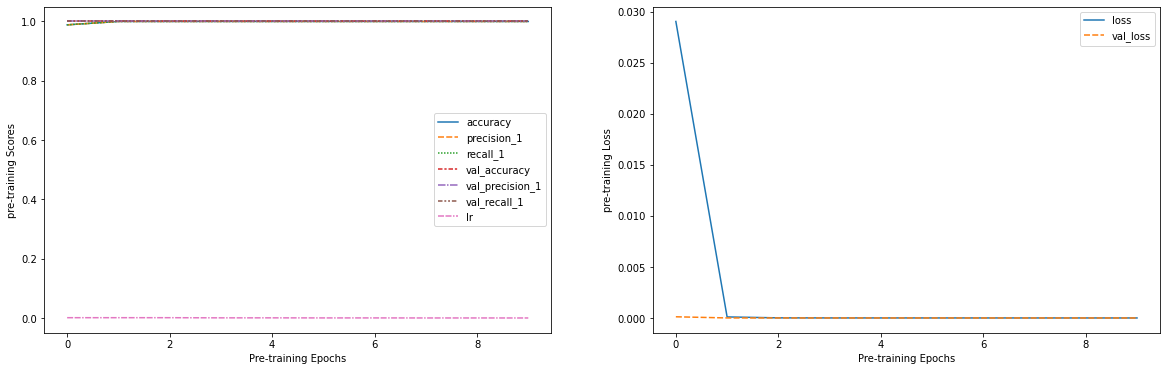

run_id:  2022-05-28_18_03_16.411421_59215526de8211eca4b2ac8247733f47
the color map for the classes, here index postion are the class number: ['green' 'blue' 'red']


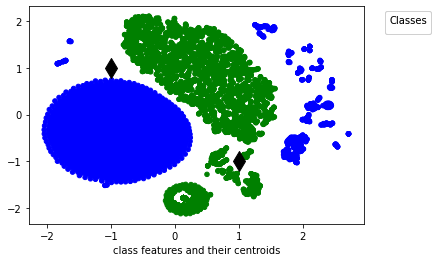

run_id:  2022-05-28_18_04_06.698139_771a7a10de8211ec9e85ac8247733f47


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.35it/s]


epoch: 1/9, train_loss: 2.562593698501587, F1_train: 0.9541098375738105 F1_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:33<00:00,  7.43it/s]


epoch: 2/9, train_loss: 2.562612295150757, F1_train: 0.9553376906318083 F1_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:33<00:00,  7.48it/s]


epoch: 3/9, train_loss: 2.5626020431518555, F1_train: 0.9556341861731082 F1_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:33<00:00,  7.46it/s]


epoch: 4/9, train_loss: 2.562602996826172, F1_train: 0.9562262098966829 F1_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:33<00:00,  7.47it/s]


epoch: 5/9, train_loss: 2.562593936920166, F1_train: 0.9564478869411605 F1_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:33<00:00,  7.46it/s]


epoch: 6/9, train_loss: 2.562592029571533, F1_train: 0.9564478869411605 F1_val: 1.0
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:33<00:00,  7.47it/s]


epoch: 7/9, train_loss: 2.5625979900360107, F1_train: 0.9564478869411605 F1_val: 1.0
train score not improving  going to wait state 2
val score not improving  going to wait state 2


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.22it/s]


epoch: 8/9, train_loss: 2.5626091957092285, F1_train: 0.9564478869411605 F1_val: 1.0
train score not improving  going to wait state 3
val score not improving  going to wait state 3


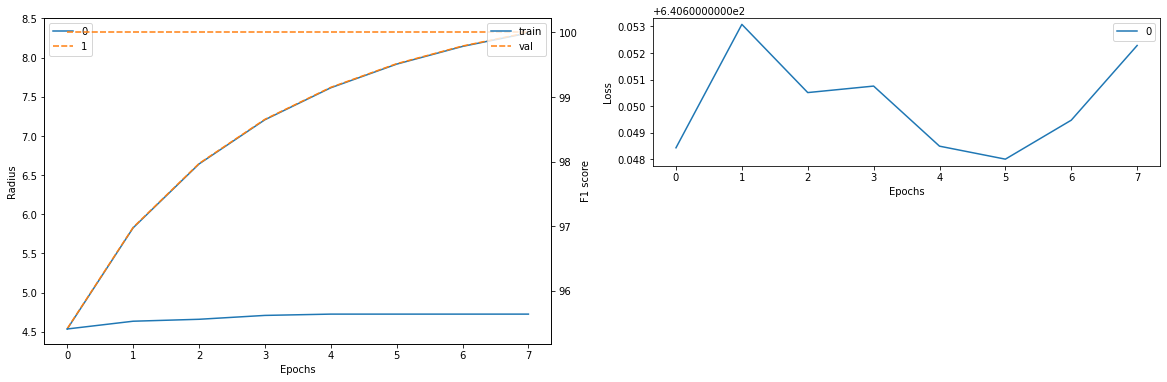

classification report for training:
[[4000    0    0]
 [   0 3359  641]
 [   0    0    0]]
91.99
f1_weighted: 0.9564478869411605, f1_macro: 0.6376319246274403, f1_micro: 0.9198750000000001, f_measure: {'Known': 95.6448, 'Open': 0, 'F1-score': 63.7632}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      0.84      0.91      4000
           5       0.00      0.00      0.00         0

    accuracy                           0.92      8000
   macro avg       0.67      0.61      0.64      8000
weighted avg       1.00      0.92      0.96      8000

classification report for test data:
[[495   0   0]
 [  0 493   0]
 [  0   0 164]]
100.0
f1_weighted: 1.0, f1_macro: 1.0, f1_micro: 1.0, f_measure: {'Known': 100.0, 'Open': 100.0, 'F1-score': 100.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       495
           1       1.00      1.00      1.00       493
     

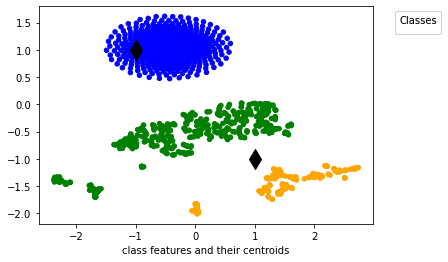

after plot ....total_label: 1152, total_preds: 1152
INFO:tensorflow:Assets written to: ram://ee9a7d99-4ef8-47cb-8427-135c8a3584c6/assets


In [13]:
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=5000,
                                                           debug=True,
                                                          designated_ukc_cls=5)
res = oset.train(train_data=train_data, val_data=val_data,
                 test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=True,                               
                 tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=16, oc_lr=2.6, pt_epochs=10, oc_epochs=9,)

## 5K with predicted label

the color map for the classes, here index postion are the class number: ['green' 'blue' 'red']


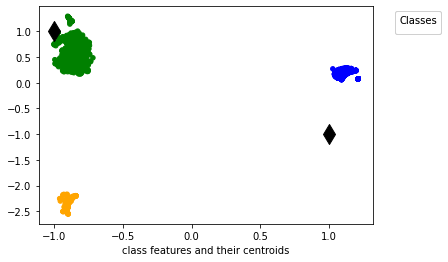

In [14]:
oset.plot_centroids(use_labels=oset.total_preds, manual_color_map=True, centroid_black=True,                               
                 tsne_n_iter=2000, tsne_perplexity=86,)

## 5K with actual label

the color map for the classes, here index postion are the class number: ['green' 'blue' 'red']


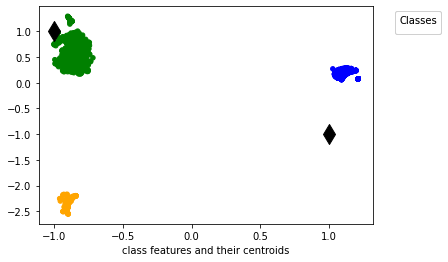

In [15]:
oset.plot_centroids(use_labels=oset.total_labels, manual_color_map=True, centroid_black=True,                               
                 tsne_n_iter=2000, tsne_perplexity=86,)